<a href="https://colab.research.google.com/github/larrymoreorless/Network-Science-Random-BA-Graph/blob/master/Random_BA_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

12674.0


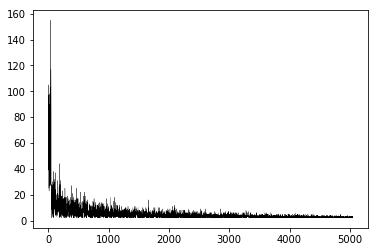

<Figure size 432x288 with 0 Axes>

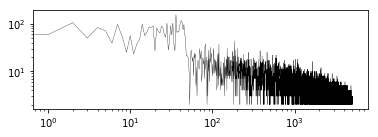

In [1]:
import numpy as np

#Set initial params for random graph
n = 50 # number of nodes
max_links = 200 #number of links to be added to the random network
P = 0.2 #probability that two randomly selected nodes will link
graph_size = list(range(0, n))
# G = {}
G = {key: [] for key in graph_size}

#Set number of nodes to be added to random graph using B.A. model
growth = 5000

#Generate random graph
link_count = 0
while link_count < max_links:
  x = np.random.randint(0, n)
  y = np.random.randint(0, n)
  if x == y:
    continue
  else:
    roll = np.random.uniform(0,1)
    if roll > P:
      G[x].append(y)
      G[y].append(x) 
 
      link_count = link_count + 1

#Add all of the new nodes. After each node is added, update their degrees. Repeat for # of iterations.
for i in range(growth):
  new_link_possibilities = (2,3)
  new_links = np.random.choice(new_link_possibilities, 1, p = (0.5, 0.5))
  p_dist = np.zeros(len(G))
  values_sum = 0
  dict_length = len(G.keys())
  
  #Get the total number of connections in the graph
  for i in G:
    p_dist[i] = len(G[i])
    values_sum = values_sum + p_dist[i]

  #Divide totals for each key by total connections to get probability for each node
  for i in G:
    p_dist[i] = p_dist[i] / values_sum

  #Choose n random keys from dict
  pref_attach = np.random.choice(dict_length, new_links, replace=False, p = p_dist)
  pref_attach = pref_attach.tolist()
 
  #Create a new node at the end of the dict and add selected nodes to it
  new_node = len(G)
  G[new_node] = pref_attach
  
  #Add links from newly created node to previously existing nodes
  for i in pref_attach:
    G[i].append(new_node)

#Get the total number of links in the network by counting all values for each key and divide by 2
total_links = 0
for i in G:
  total_links = total_links + len(G[i])

total_links = total_links/2
print(total_links)

#Plot the degree distribution in linear and log-log scale
import matplotlib.pyplot as plt
node_degree = np.zeros(len(G))
for i in G:
  node_degree[i] = len(G[i])
  
from matplotlib import pyplot

plt.plot(node_degree, color='black', lw=0.3)
plt.figure(0)
pyplot.show()

plt.subplot(2,1,1)
plt.figure(1)
plt.plot(node_degree, color='black', lw=0.3)
plt.yscale('log')
plt.xscale('log')
pyplot.show()

